In [1]:
### IMPORT: ------------------------------------
import scipy.stats as stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings

In [2]:
from scipy.stats import skew
plt.style.use('ggplot')
import missingno as msno # to get visualization on missing values
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations
import statsmodels.api as sm
print("Loaded all the Libraries")

Loaded all the Libraries


In [3]:
#Reading the csv file  used car data.csv 
import os
os.chdir('../Capstone')
df=pd.read_csv('Usedcarsdata.csv', index_col=0)
cars=df.copy()
print(f'There are {cars.shape[0]} rows and {cars.shape[1]} columns') # fstring 

There are 7906 rows and 17 columns


In [4]:
# inspect data, print top 5 
cars.head(5)

,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
Sales_ID,,,,,,,,,,,,,,,,,
1,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5,Y
2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5,Y
3,Honda City 2017-2020 EXi,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5,Y
4,Hyundai i20 Sportz Diesel,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5,Y
5,Maruti Swift VXI BSIII,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5,Y


In [5]:
# bottom 5 rows:
cars.tail(5)

,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
Sales_ID,,,,,,,,,,,,,,,,,
8124,Hyundai i20 Magna,2013,320000,110000,Central,Texas,Plano,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5,N
8125,Hyundai Verna CRDi SX,2007,135000,119000,Central,Texas,Port Arthur,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5,N
8126,Maruti Swift Dzire ZDi,2009,382000,120000,Central,Texas,Port Arthur,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5,N
8127,Tata Indigo CR4,2013,290000,25000,East,Massachusetts,Lunenburg,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5,N
8128,Tata Indigo CR4,2013,290000,25000,East,Maine,Augusta,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5,N


In [6]:
#get the size of dataframe
print ("Rows     : " , cars.shape[0])  #get number of rows/observations
print ("Columns  : " , cars.shape[1]) #get number of columns
print ("#"*40,"\n","Features : \n\n", cars.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", cars.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(cars.isna().sum() / cars.isna().count() * 100, 2)) # looking at columns with most Missing Values
print ("#"*40,"\nUnique values :  \n\n", cars.nunique())  #  count of unique values


Rows     :  7906
Columns  :  17
######################################## 
 Features : 

 ['name', 'year', 'selling_price', 'km_driven', 'Region', 'State or Province', 'City', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'sold']
######################################## 
Missing values :

 name                 0
transmission         0
seats                0
torque               0
max_power            0
engine               0
mileage              0
owner                0
seller_type          0
year                 0
fuel                 0
City                 0
State or Province    0
Region               0
km_driven            0
selling_price        0
sold                 0
dtype: int64
######################################## 
Percent of missing :

 name                0.00000
year                0.00000
selling_price       0.00000
km_driven           0.00000
Region              0.00000
State or Province   0.00000
City              

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 1 to 8128
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               7906 non-null   object
 1   year               7906 non-null   int64 
 2   selling_price      7906 non-null   int64 
 3   km_driven          7906 non-null   int64 
 4   Region             7906 non-null   object
 5   State or Province  7906 non-null   object
 6   City               7906 non-null   object
 7   fuel               7906 non-null   object
 8   seller_type        7906 non-null   object
 9   transmission       7906 non-null   object
 10  owner              7906 non-null   object
 11  mileage            7906 non-null   object
 12  engine             7906 non-null   object
 13  max_power          7906 non-null   object
 14  torque             7906 non-null   object
 15  seats              7906 non-null   int64 
 16  sold               7906 non-null   object


In [8]:
# Making a list of all categorical variables
cat_col = [
    "Region",
    "State or Province",
    "City",
    "fuel",
    "seller_type",
    "transmission",
    "owner",
    "seats"
    
]
# Printing number of count of each unique value in each column
for column in cat_col:
    print(cars[column].value_counts())
    print("#" * 40)


Central    2376
West       1976
East       1939
South      1615
Name: Region, dtype: int64
########################################
California              901
Texas                   499
New York                491
Illinois                489
Florida                 425
Ohio                    321
Michigan                305
Washington              295
Pennsylvania            235
North Carolina          222
Indiana                 213
Massachusetts           191
Georgia                 187
Minnesota               169
Virginia                167
Colorado                154
New Jersey              154
Maryland                144
Missouri                141
Tennessee               135
Utah                    133
Oregon                  129
Iowa                    123
Wisconsin               117
Arizona                 115
Kansas                  112
Maine                   110
Arkansas                107
Alabama                 106
Oklahoma                 95
Idaho                    89


## Observations

 - Central Region has a highest value of 2376 cars being sold.
 - California holds the maximum number of cars being sold as 901.
 - Maximum no. of cars(4299) being sold have fuel type as Diesel.
 - New York has the highest number of cars(196) available for purchase.
 - Most of them prefer to buy cars from an individual rather from a dealer.
     (6563 cars are bought from individuals)
 - 6875 cars with Manual transmission are available for purchase.
 - Most of the cars are 5 seaters and First owned. It hold a value as 6254.
 - Year of cars ranges form 1994-2020

# Data Preprocessing

### Processing Engine,Power ,Mileage columns

Removing the units from Engine ,Power and Mileage as the Data type is object. It'll be feasible to use, if we strip those units.

In [9]:
#np.random.seed(9)
cars[['engine','max_power','mileage']].sample(10)

,engine,max_power,mileage
Sales_ID,,,
4689,1498 CC,88 bhp,20.14 kmpl
5823,2494 CC,100.6 bhp,12.99 kmpl
4956,2179 CC,140 bhp,15.1 kmpl
7991,1396 CC,69.01 bhp,25.0 kmpl
3729,1197 CC,81.80 bhp,21.21 kmpl
2194,799 CC,53.3 bhp,25.17 kmpl
2628,2200 CC,139.01 bhp,17.0 kmpl
1417,1396 CC,88.73 bhp,22.54 kmpl
4991,796 CC,46.3 bhp,19.7 kmpl


In [10]:
typeoffuel=['CNG','LPG','Petrol','Disel']
cars.loc[cars.fuel.isin(typeoffuel)].head(10)

,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
Sales_ID,,,,,,,,,,,,,,,,,
3,Honda City 2017-2020 EXi,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5,Y
5,Maruti Swift VXI BSIII,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5,Y
6,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,East,New York,New York City,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5,Y
7,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,West,California,Los Angeles,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5,Y
8,Maruti 800 DX BSII,2001,45000,5000,West,California,Los Angeles,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4,Y
12,Maruti Zen LX,2005,92000,100000,Central,Texas,Houston,Petrol,Individual,Manual,Second Owner,17.3 kmpl,993 CC,60 bhp,78Nm@ 4500rpm,5,Y
15,Maruti Wagon R LXI Minor,2009,180000,90000,East,Massachusetts,Boston,Petrol,Individual,Manual,Second Owner,18.9 kmpl,1061 CC,67 bhp,84Nm@ 3500rpm,5,Y
16,Mahindra KUV 100 mFALCON G80 K8 5str,2016,400000,40000,East,Massachusetts,Boston,Petrol,Individual,Manual,First Owner,18.15 kmpl,1198 CC,82 bhp,115Nm@ 3500-3600rpm,5,Y
19,Maruti Alto LX,2002,150000,80000,Central,Texas,Dallas,Petrol,Individual,Manual,Second Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5,Y


### Mileage

In [11]:
#cars[cars.mileage.isnull()==True]

In [12]:
cars["mileage"] = cars["mileage"].str.rstrip(" kmpl")
cars["mileage"] = cars["mileage"].str.rstrip(" km/g")


### Engine 

In [13]:
#remove units
cars["engine"] = cars["engine"].str.rstrip(" CC")


### Power

In [14]:
#remove bhp and replace null with nan
cars["max_power"] = cars["max_power"].str.rstrip(" bhp")
cars["max_power"]= cars["max_power"].replace(regex="null", value = np.nan)


In [19]:
#verify the data
num=['engine','max_power','mileage']
cars[num].sample(20)

,engine,max_power,mileage
Sales_ID,,,
5346,998,67.04,23.1
4699,1248,74,25.2
7815,1497,78,17.7
2061,1498,103.2,21.21
6509,2179,138.03,13.93
283,1197,82,18.9
1223,796,46.3,19.7
804,814,55.2,21.1
1855,1199,79.4,18.6


Re-verifying data for missing values

In [92]:
cars.query("max_power == '0.0'")['max_power'].count()

0

In [93]:
cars.query("mileage == '0.0'")['mileage'].count()


0

In [17]:
cars.loc[cars["engine"]=='0.0','engine'].count()

0

In [20]:
cars[num].nunique()

engine       121
max_power    320
mileage      381
dtype: int64

In [21]:
cars[num].isnull().sum()

engine       0
max_power    0
mileage      0
dtype: int64

The above depicts that, there are no missing values

# Feature Engineering

## converting datatype

In [22]:
#converting object data type to category data type
cars["fuel"] = cars["fuel"].astype("category")
cars["transmission"] = cars["transmission"].astype("category")
cars["owner"] = cars["owner"].astype("category")
#converting datatype  
cars["mileage"] = cars["mileage"].astype(float)
cars["max_power"] = cars["max_power"].astype(float)
cars["engine"]=cars["engine"].astype(float)

In [23]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7906.00000,2013.98394,3.86370,1994.00000,2012.00000,2015.00000,2017.00000,2020.00000
selling_price,7906.00000,649813.72084,813582.74835,29999.00000,270000.00000,450000.00000,690000.00000,10000000.00000
km_driven,7906.00000,69188.65975,56792.29634,1.00000,35000.00000,60000.00000,95425.00000,2360457.00000
mileage,7906.00000,19.41986,4.03626,0.00000,16.78000,19.30000,22.32000,42.00000
engine,7906.00000,1458.70883,503.89306,624.00000,1197.00000,1248.00000,1582.00000,3604.00000
max_power,7906.00000,91.58737,35.74722,32.80000,68.05000,82.00000,102.00000,400.00000
seats,7906.00000,5.41639,0.95921,2.00000,5.00000,5.00000,5.00000,14.00000


### Processing Years to Derive Age of car

Deriving the age of car would be helpful to know how old the car is. 
Hence, we create two new columns current year and Age. Current year would be 2022 and Age column would be Ageofcar= currentyear-year. And then drop currentyear columns


In [96]:
cars['Current_year']=2022
cars['Ageofcar']=cars['Current_year']-cars['year']
cars.drop('Current_year',axis=1,inplace=True)
cars.head()

,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold,Ageofcar
Sales_ID,,,,,,,,,,,,,,,,,,
1,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5,Y,8
2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5,Y,8
3,Honda City 2017-2020 EXi,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5,Y,16
4,Hyundai i20 Sportz Diesel,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5,Y,12
5,Maruti Swift VXI BSIII,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5,Y,15


### Processing Name column

Brands do play an important role in Car selection and Prices. So extracting brand names from the Name.

In [26]:
#dropping rows with name as null
cars['name'] = cars.dropna(subset=['name'])

In [28]:
#As mentioned in dataset car name has Brand and model so extracting it ,This can help to fill missing values of price column as brand 
cars['Brand'] = cars['name'].str.split(' ').str[0] #Separating Brand name from the Name
cars['Model'] = cars['name'].str.split(' ').str[1] + cars['name'].str.split(' ').str[2]


In [29]:
cars.Brand.unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [30]:
col=['Land','MG','Force','Ashok']
#correcting brand names
cars[cars.Brand.isin(col)].sample(5)

,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold,Ageofcar,Brand,Model
Sales_ID,,,,,,,,,,,,,,,,,,,,
143,MG Hector Sharp AT BSIV,2019,1750000,19000,West,California,San Diego,Petrol,Dealer,Automatic,First Owner,13.96000,1451.00000,141.00000,250Nm@ 1600-3600rpm,5,Y,2,MG,HectorSharp
1990,MG Hector Sharp DCT Dualtone,2020,1900000,1600,West,Oregon,Aloha,Petrol,Dealer,Automatic,First Owner,13.96000,1451.00000,141.00000,250Nm@ 1600-3600rpm,5,Y,1,MG,HectorSharp
7342,Force Gurkha Hard Top BS3 4WD,2018,910000,20000,West,Idaho,Eagle,Diesel,Dealer,Manual,First Owner,17.00000,2596.00000,80.80000,230Nm@ 1800-2000rpm,5,N,3,Force,GurkhaHard
136,Land Rover Discovery Sport TD4 SE,2019,4500000,21000,West,California,Los Angeles,Diesel,Dealer,Automatic,First Owner,12.83000,1999.00000,148.31000,382nm@ 1750-2250rpm,7,Y,2,Land,RoverDiscovery
1983,Force Gurkha Hard Top BS3 4WD,2018,910000,20000,Central,Indiana,Merrillville,Diesel,Dealer,Manual,First Owner,17.00000,2596.00000,80.80000,230Nm@ 1800-2000rpm,5,Y,3,Force,GurkhaHard


In [31]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 1 to 8128
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               7906 non-null   object  
 1   year               7906 non-null   int64   
 2   selling_price      7906 non-null   int64   
 3   km_driven          7906 non-null   int64   
 4   Region             7906 non-null   object  
 5   State or Province  7906 non-null   object  
 6   City               7906 non-null   object  
 7   fuel               7906 non-null   category
 8   seller_type        7906 non-null   object  
 9   transmission       7906 non-null   category
 10  owner              7906 non-null   category
 11  mileage            7906 non-null   float64 
 12  engine             7906 non-null   float64 
 13  max_power          7906 non-null   float64 
 14  torque             7906 non-null   object  
 15  seats              7906 non-null   int64   
 16  sold  

In [32]:
#changing brandnames
cars.loc[cars.Brand=='Land','Brand']='Land Rover'
cars.loc[cars.Brand=='MG','Brand']='MG Hector'
cars.loc[cars.Brand=='Force','Brand']='Force One'
cars.loc[cars.Brand=='Ashok','Brand']='Ashok Leyland'
#cars['Brand']=cars["Brand"].astype("category")

In [33]:
cars.Brand.nunique()

31

In [34]:
cars.groupby(cars.Brand).size().sort_values(ascending =False)

Brand
Maruti           2367
Hyundai          1360
Mahindra          758
Tata              719
Honda             466
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        185
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               41
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Land Rover          6
Force One           6
Isuzu               5
Ambassador          4
Kia                 4
MG Hector           3
Daewoo              3
Opel                1
Ashok Leyland       1
dtype: int64

#### There are 31 unique Brands in the dataset. Maruti brand is most available for purchase/Sold followed by Hyundai.

In [35]:
cars.Model.isnull().sum()

0

In [36]:
#drop row with no model
cars.dropna(subset=['Model'],axis=0,inplace=True)

In [37]:
cars.Model.nunique()

664

In [38]:
cars.groupby('Model')['Model'].size().nlargest(30)

Model
SwiftDzire         376
WagonR             282
Grandi10           194
Innova2.5          185
Alto800            144
Bolero2011-2019    116
SwiftVDI           116
Verna1.6           112
AltoK10            110
AltoLXi             92
VitaraBrezza        84
EcoSport1.5         81
FigoDiesel          77
IndicaVista         76
Cityi               74
SwiftAMT            71
IndigoCS            70
Creta1.6            69
SwiftVXI            68
i201.2              63
X4M                 62
i10Magna            61
i20Asta             59
IndicaV2            58
EONEra              57
SantroXing          57
TUV300              56
Xcent1.2            56
AltoLX              54
BalenoAlpha         54
Name: Model, dtype: int64

There are 664 unique models and Swift Dzire is most popular Model.

# EDA


In [39]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 1 to 8128
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               7906 non-null   object  
 1   year               7906 non-null   int64   
 2   selling_price      7906 non-null   int64   
 3   km_driven          7906 non-null   int64   
 4   Region             7906 non-null   object  
 5   State or Province  7906 non-null   object  
 6   City               7906 non-null   object  
 7   fuel               7906 non-null   category
 8   seller_type        7906 non-null   object  
 9   transmission       7906 non-null   category
 10  owner              7906 non-null   category
 11  mileage            7906 non-null   float64 
 12  engine             7906 non-null   float64 
 13  max_power          7906 non-null   float64 
 14  torque             7906 non-null   object  
 15  seats              7906 non-null   int64   
 16  sold  

In [40]:
cars.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,Ageofcar
count,7906.00000,7906.00000,7906.00000,7906.00000,7906.00000,7906.00000,7906.00000,7906.00000
mean,2013.98394,649813.72084,69188.65975,19.41986,1458.70883,91.58737,5.41639,7.01606
std,3.86370,813582.74835,56792.29634,4.03626,503.89306,35.74722,0.95921,3.86370
min,1994.00000,29999.00000,1.00000,0.00000,624.00000,32.80000,2.00000,1.00000
25%,2012.00000,270000.00000,35000.00000,16.78000,1197.00000,68.05000,5.00000,4.00000
50%,2015.00000,450000.00000,60000.00000,19.30000,1248.00000,82.00000,5.00000,6.00000
75%,2017.00000,690000.00000,95425.00000,22.32000,1582.00000,102.00000,5.00000,9.00000
max,2020.00000,10000000.00000,2360457.00000,42.00000,3604.00000,400.00000,14.00000,27.00000


### Observations

- Years is left skewed. Years ranges from 1994-2022 . Age of cars 2 year old to 28 years old

- km driven , median is ~56k Km and mean is ~69K. Max values seems to be 2360457. This is very high , and seems to be outlier. Need to analyze further.

- Mileage is almost Normally distrubuted.

- Engine is right skewed and has outliers on higher and lower end.

- Power and Price are also right skewed.

- Price 100 Lakh is too much for a used car. Seems to be an outlier.

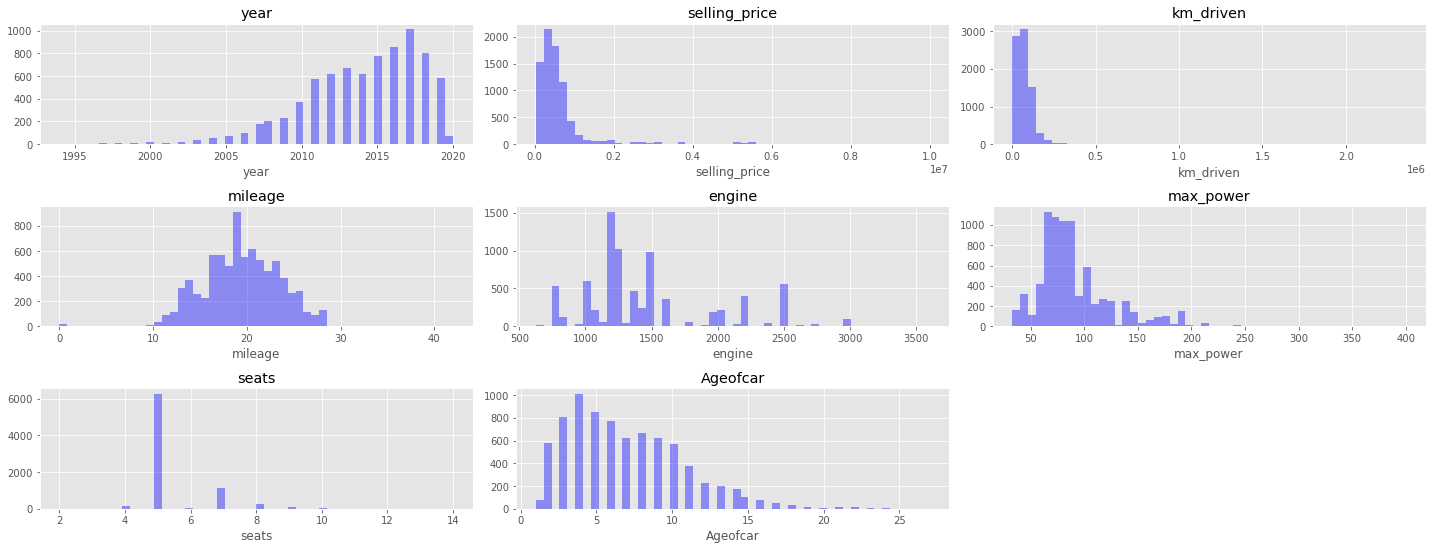

In [41]:
plt.style.use('ggplot')
#select all quantitative columns for checking the spread
numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)
                       
                     sns.distplot(cars[variable],kde=False,color='blue')
                     plt.tight_layout()
                     plt.title(variable)

### Observations
  
- Year is left skewed and has outliers on lower side., This column can be dropped
- km_driven is right skewed.
- Mileage is almost Normally distrubuted. Has few outliers on upper and lower side. we'll check further.
- Engine ,power and price are  right skewed and has outliers on upper side.
- Age of car is right skewed.


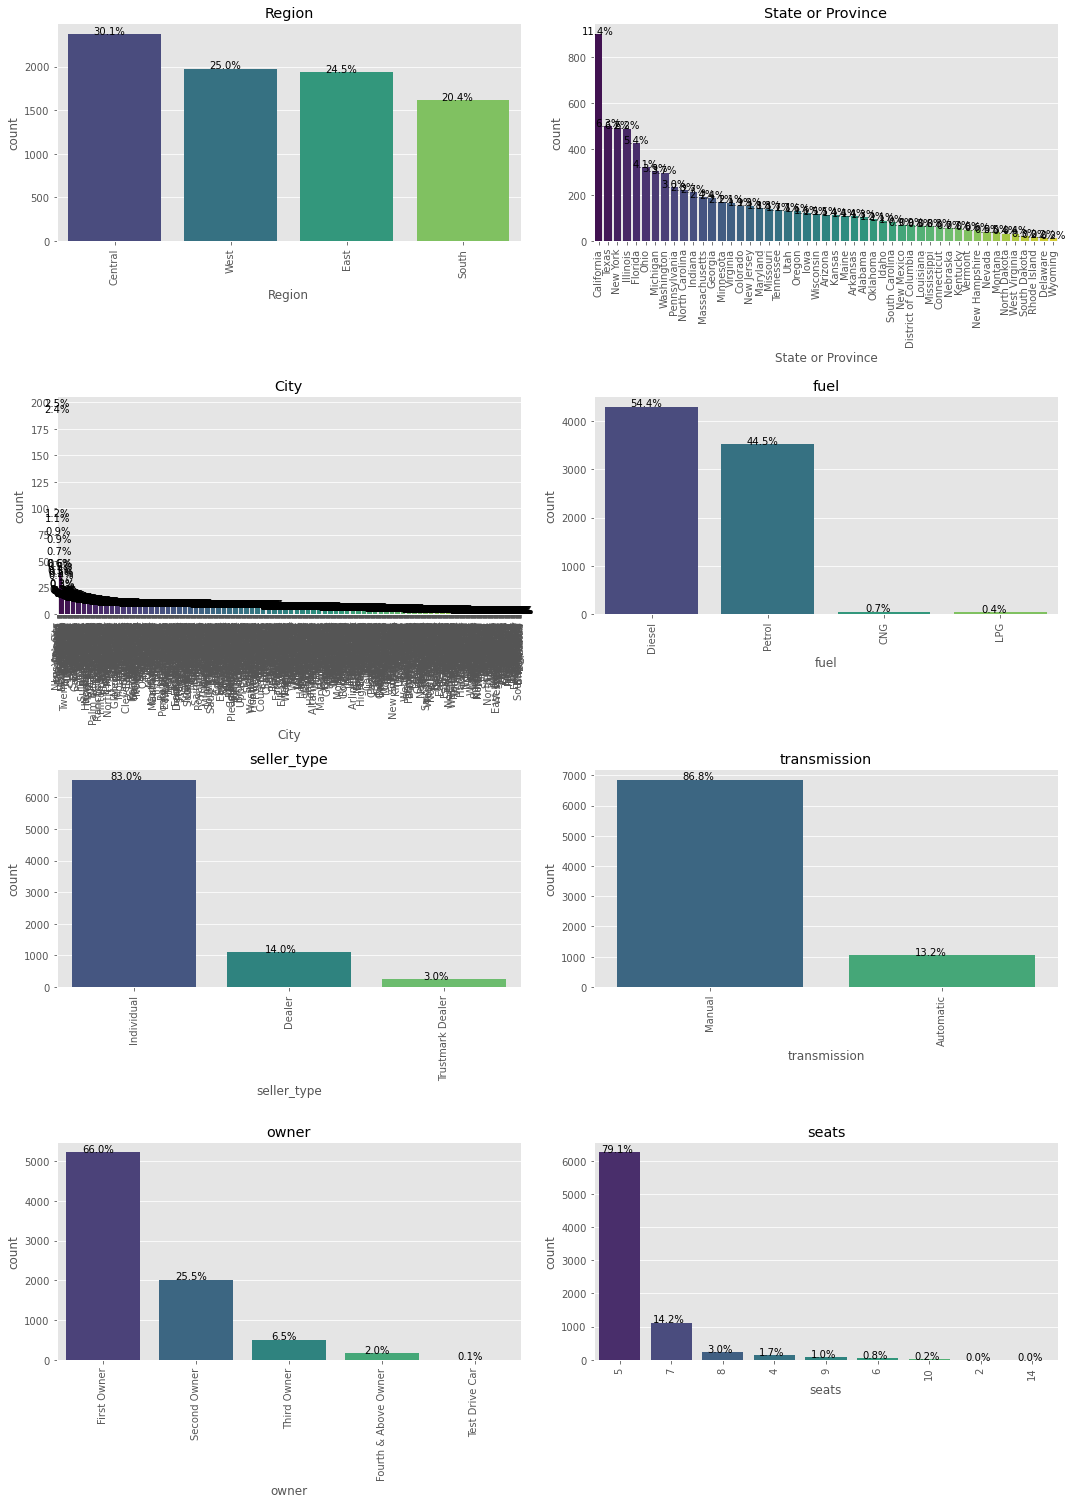

In [43]:
cat_columns=[
    "Region",
    "State or Province",
    "City",
    "fuel",
    "seller_type",
    "transmission",
    "owner",
    "seats"
    
] 
#cars.select_dtypes(exclude=np.number).columns.tolist()
plt.figure(figsize=(15,21))

for i, variable in enumerate(cat_columns):
                     plt.subplot(4,2,i+1)
                     order = cars[variable].value_counts(ascending=False).index    
                     ax=sns.countplot(x=cars[variable], data=cars , order=order ,palette='viridis')
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(cars[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)


### Observations
    
-  30.1% cars are available in the Central Region.
-  11.4% cars are available in California.
-  83% prefer buying from an individual rather than a dealer.
-  54.4% prefer Diesel based Fuel Cars.
-  66% cars are first owners.
-  79.1% prefer 5 seater cars.
-  86.8% cars available to be sold with manual Transmission.

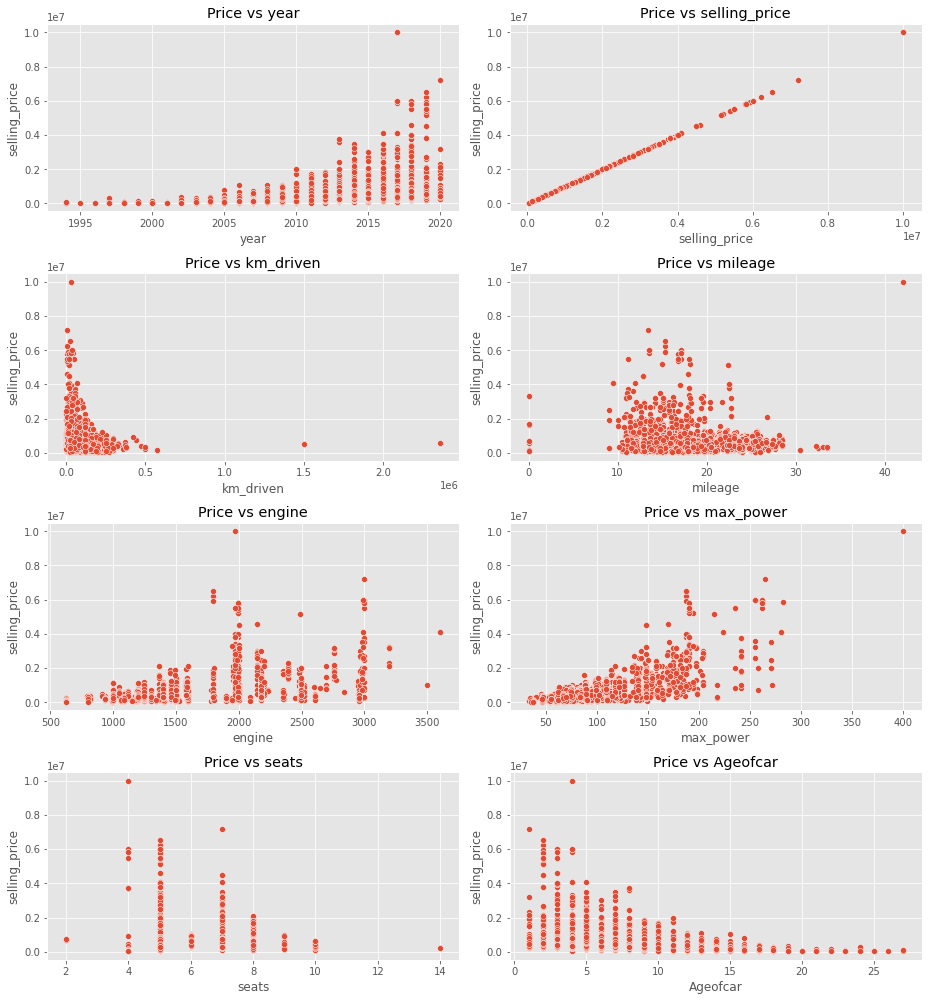

In [44]:
numeric_columns= numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=cars[variable],y=cars['selling_price']).set(title='Price vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()

In [45]:
cars.groupby(['Brand','engine'])['max_power'].agg({'mean','median','max'}).head(10)

median       max      mean
Brand         engine                                  
Ambassador    1489.00000  35.50000  35.50000  35.50000
              1995.00000  52.00000  52.00000  52.00000
Ashok Leyland 1461.00000  75.00000  75.00000  75.00000
Audi          1781.00000 163.20000 163.20000 163.20000
              1798.00000 187.74000 187.74000 185.18000
              1968.00000 174.33000 188.00000 175.58808
              2967.00000 241.40000 241.40000 241.40000
BMW           1995.00000 190.00000 218.00000 188.95479
              1998.00000 190.00000 190.00000 189.75000
              2497.00000 150.00000 150.00000 150.00000

In [51]:
#using business knowledge to create class 
Low=['Maruti',
     'Skoda',
     'Honda',
     'Hyundai',
     'Toyota',
     'Ford',
     'Renault',
     'Mahindra',
     'Tata',
     'Chevrolet',
     'Datsun',
     'Daewoo',
     'Kia',
     'Force One',
     'Ambassdor',
     'Ashok Leyland',
     'Isuzu',
     'Opel']

High=['Mercedes-Benz',
      'Jeep',
      'Audi',
      'Volkswagen',
      'BMW',
      'Nissan',
      'Lexus',
      'Jaguar',
      'Land Rover',
      'MG Hector',
      'Volvo']# more than 30lakh

In [52]:
def classrange(x):
    if x in Low:
        return "Low"
    elif x in High:
        return "High"
    else: 
        return x

In [53]:
cars['Brand_Class'] = cars['Brand'].apply(lambda x: classrange(x))

In [54]:
cars['Brand_Class'].unique()

array(['Low', 'High', 'Mitsubishi', 'Fiat', 'Ambassador'], dtype=object)

In [56]:
cars['engine']=cars['engine'].astype(int)
cars['Brand_Class']=cars["Brand_Class"].astype('category')

### Bivariate & Multivariate Analysis

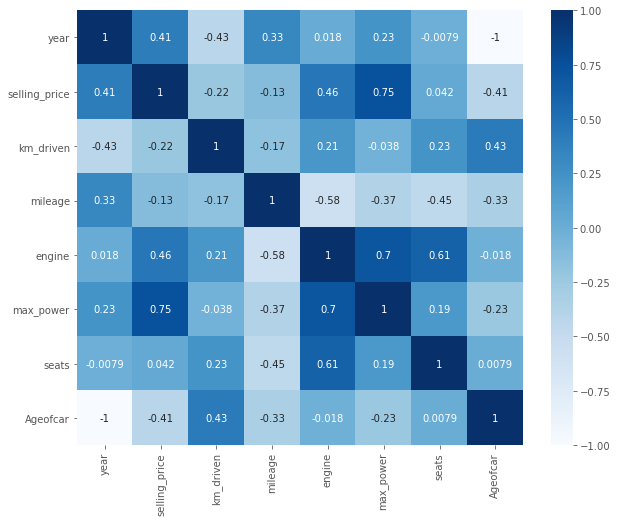

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(cars.corr(),annot=True ,cmap="Blues" )
plt.show()

#### Observations
    
- Engine has strong positive correlation to Power [0.7]. 
- Price has positive correlation to Engine[0.46] as well Power [0.75].
- Mileage is negative correlated to Engine,Power,Price.,Ageofcar
- Price has negative correlation to age of car.

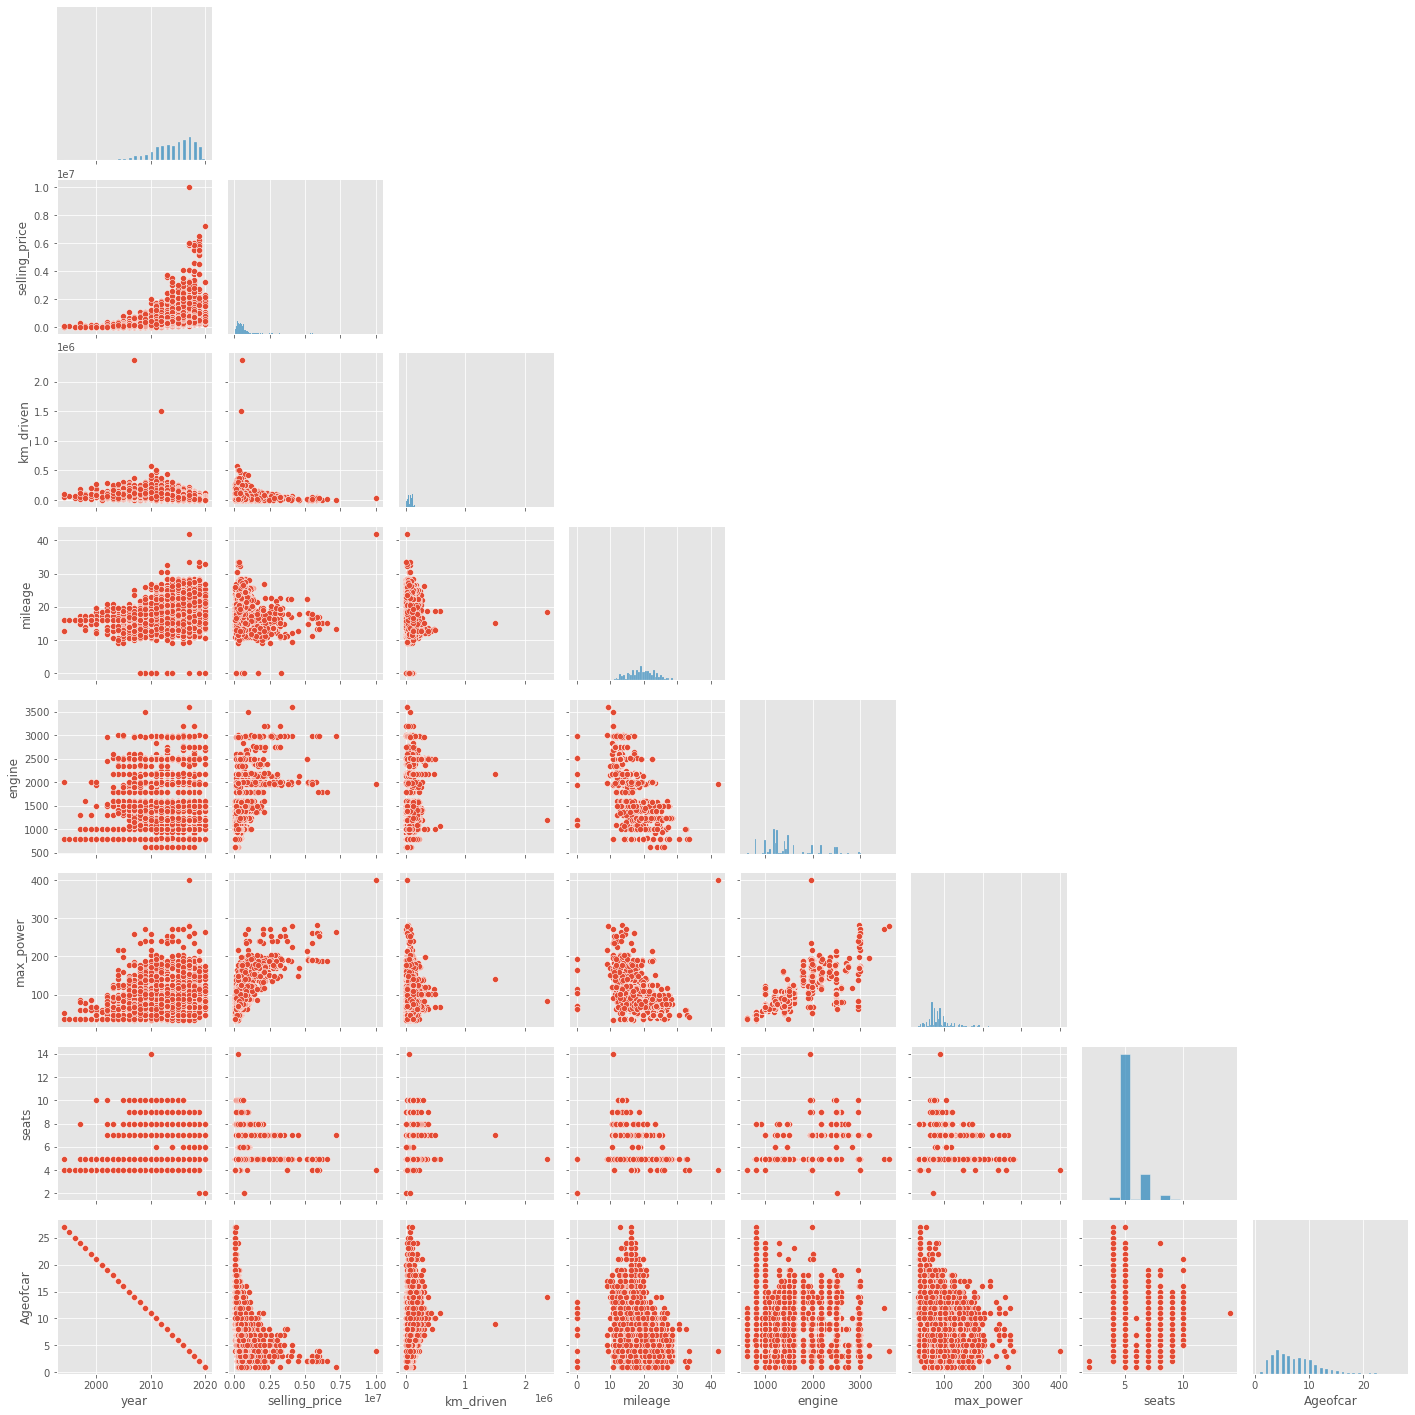

In [57]:
sns.pairplot(data=cars , corner=True)
plt.show()

#### Observations
    
- Same observation  about correlation as seen in heatmap.
- km driven does not have impact on  Price . 
- As power increases mileage decreases.
- Car with recent years gets sold at higher prices.
- If Engine and Power increase, price of the car seems to increase.

### Variables that are correlated with Price variable

#### Price  Vs Engine Vs Transmission

<AxesSubplot:title={'center':'Price VS Engine based on Transmission'}, xlabel='selling_price', ylabel='engine'>

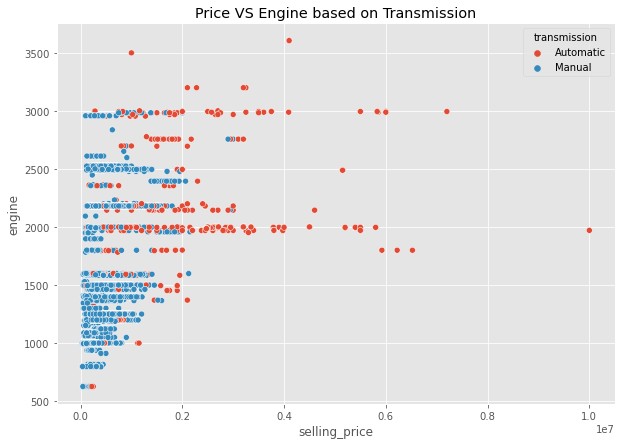

In [58]:
# understand relation ship of Engine vs Price and Transmimssion
plt.figure(figsize=(10,7))

plt.title("Price VS Engine based on Transmission")
sns.scatterplot(y='engine', x='selling_price', hue='transmission', data=cars)

#### Price Vs Power vs Transmission

<AxesSubplot:title={'center':'Price vs Max_Power based on Transmission'}, xlabel='selling_price', ylabel='max_power'>

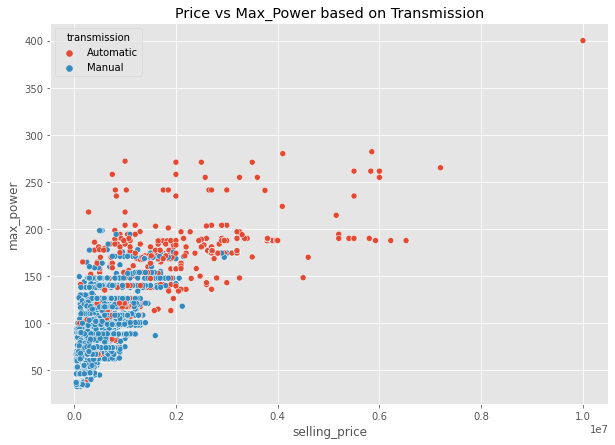

In [59]:
 #understand relationship betweem Price and Power
plt.figure(figsize=(10,7))
plt.title("Price vs Max_Power based on Transmission")
sns.scatterplot(y='max_power', x='selling_price', hue='transmission', data=cars)

#### Price Vs Mileage Vs Transmission

<AxesSubplot:xlabel='selling_price', ylabel='mileage'>

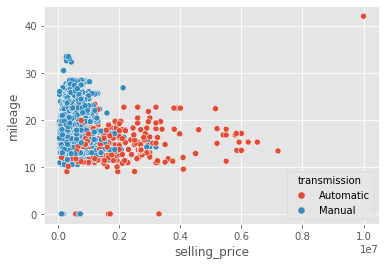

In [60]:
# Understand the relationships  between mileage and Price
sns.scatterplot(y='mileage', x='selling_price', hue='transmission', data=cars)

#### Price Vs Year Vs Transmission

<AxesSubplot:title={'center':'Price based on manufacturing Year of model'}, xlabel='year', ylabel='selling_price'>

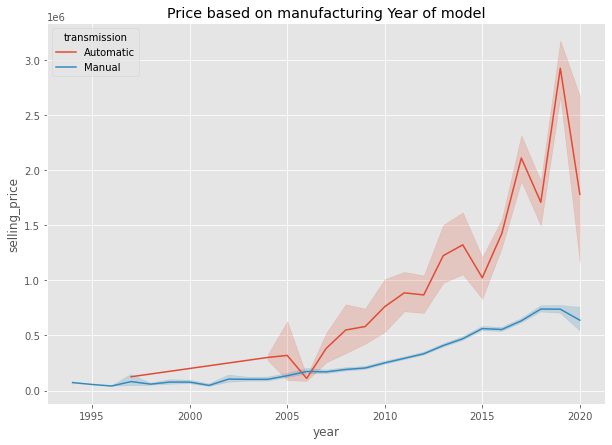

In [61]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='year', y='selling_price',hue='transmission',
             data=cars)


#### Price Vs Year VS Fuel Type

<AxesSubplot:title={'center':'Price Vs Year VS FuelType'}, xlabel='year', ylabel='selling_price'>

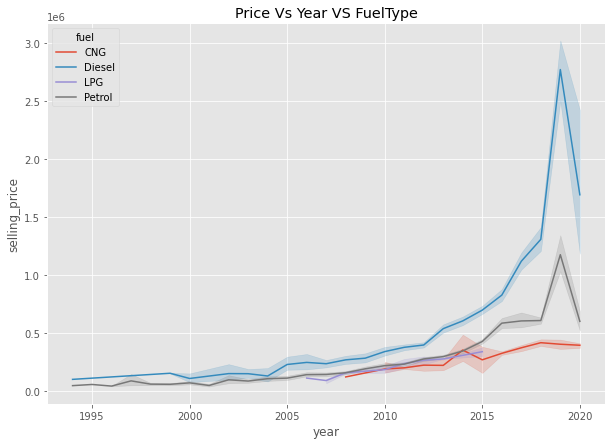

In [62]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS FuelType")
sns.lineplot(x='year', y='selling_price',hue='fuel',
             data=cars)

#### Year Vs Price Vs Owner_Type

<AxesSubplot:title={'center':'Price Vs Year VS Owner_Type'}, xlabel='year', ylabel='selling_price'>

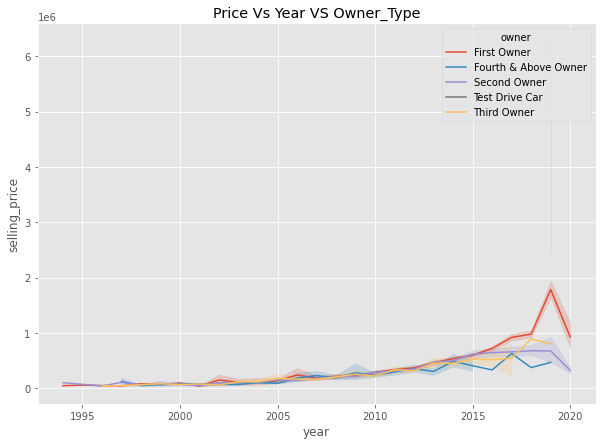

In [63]:
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS Owner_Type")
sns.lineplot(x='year', y='selling_price',hue='owner',
             data=cars)

In [64]:
cars.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,Ageofcar
count,7906.00000,7906.00000,7906.00000,7906.00000,7906.00000,7906.00000,7906.00000,7906.00000
mean,2013.98394,649813.72084,69188.65975,19.41986,1458.70883,91.58737,5.41639,7.01606
std,3.86370,813582.74835,56792.29634,4.03626,503.89306,35.74722,0.95921,3.86370
min,1994.00000,29999.00000,1.00000,0.00000,624.00000,32.80000,2.00000,1.00000
25%,2012.00000,270000.00000,35000.00000,16.78000,1197.00000,68.05000,5.00000,4.00000
50%,2015.00000,450000.00000,60000.00000,19.30000,1248.00000,82.00000,5.00000,6.00000
75%,2017.00000,690000.00000,95425.00000,22.32000,1582.00000,102.00000,5.00000,9.00000
max,2020.00000,10000000.00000,2360457.00000,42.00000,3604.00000,400.00000,14.00000,27.00000


#### Price Vs Mileage vs Fuel_type

<AxesSubplot:title={'center':'Price Vs Mileage'}, xlabel='mileage', ylabel='selling_price'>

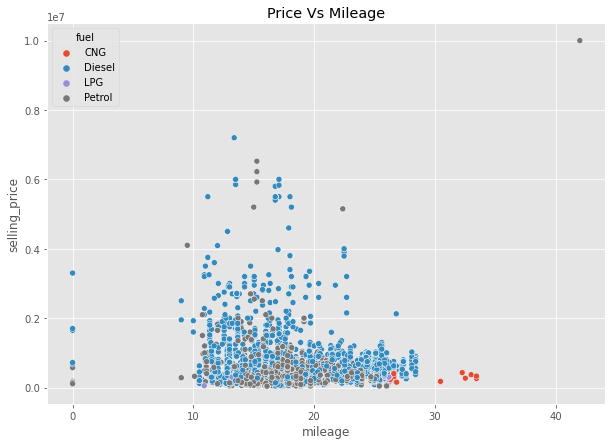

In [65]:
# Understand relationships  between price and mileage
plt.figure(figsize=(10,7))
plt.title("Price Vs Mileage")
sns.scatterplot(y='selling_price', x='mileage', hue='fuel', data=cars)

#### Price Vs Seat

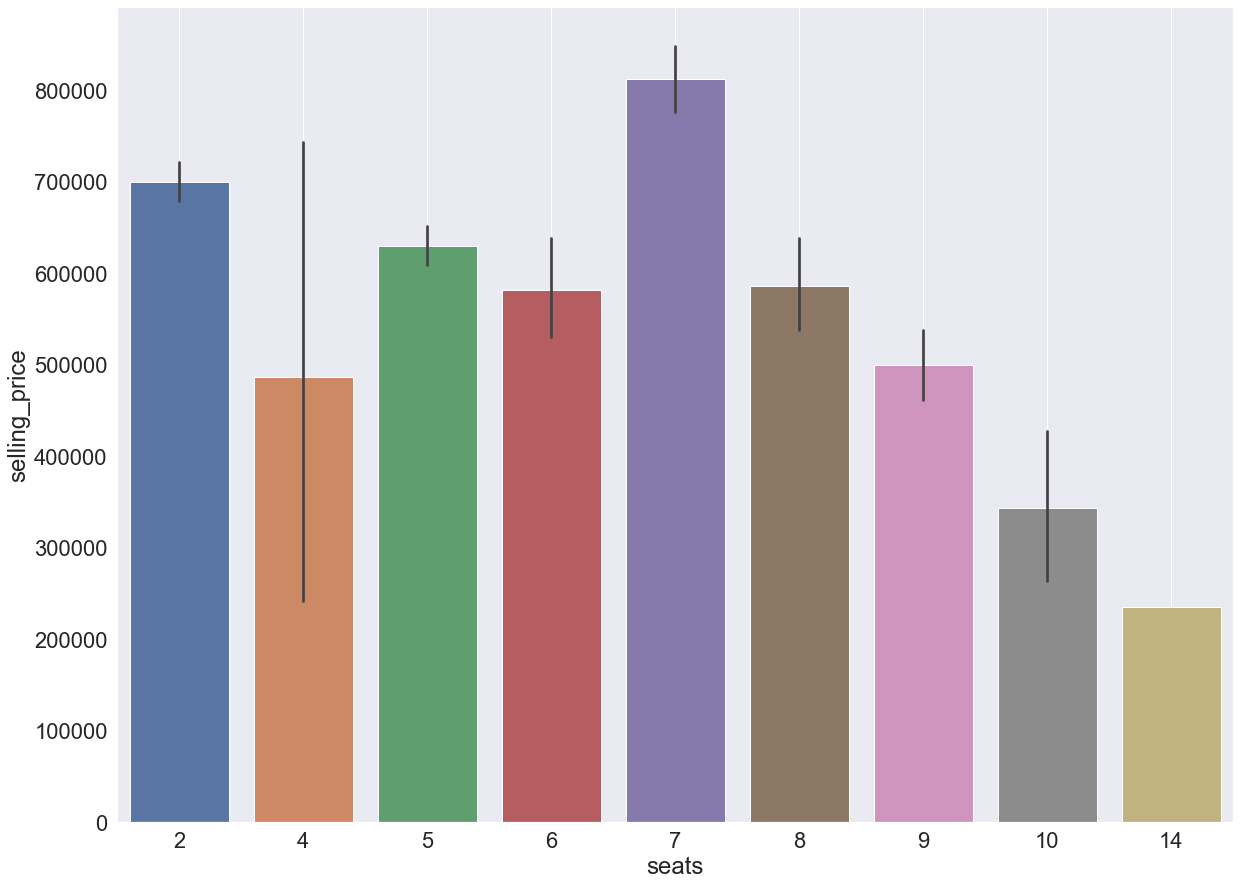

In [66]:
#Price and seats 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='seats', y='selling_price', data=cars)
plt.grid()

#### Price Vs Region

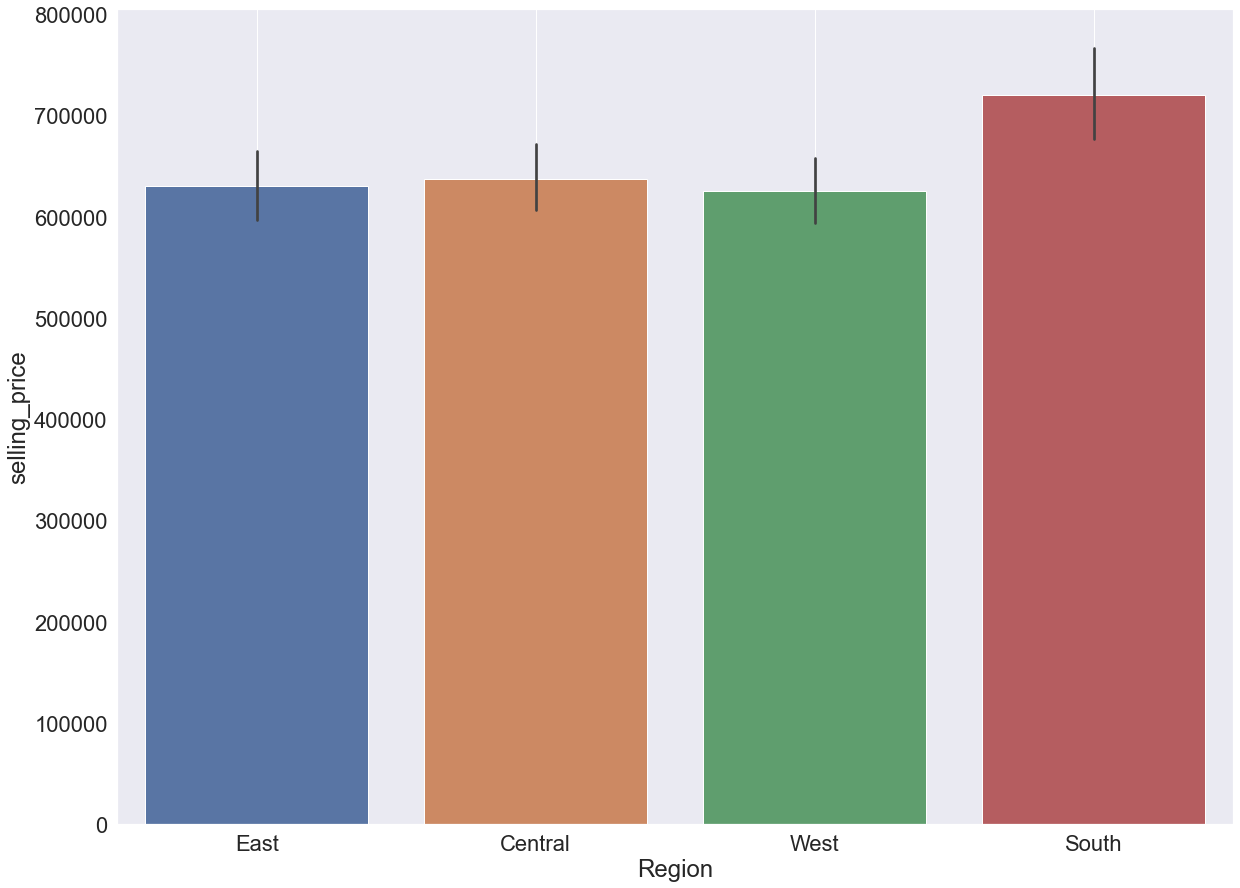

In [67]:
#Price and Region 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Region', y='selling_price', data=cars)
plt.grid()

#### Price vs State 

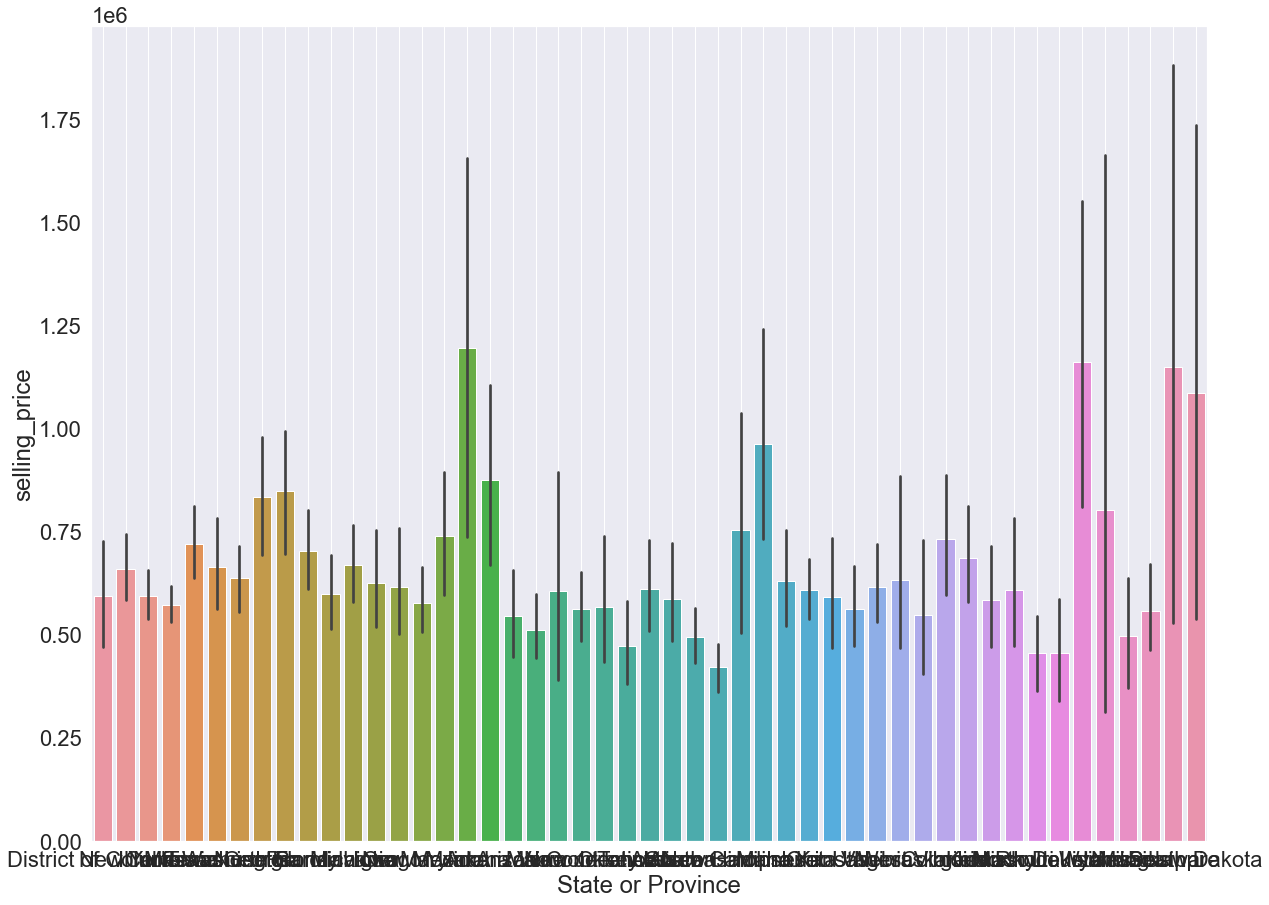

In [71]:
#Price and State
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='State or Province', y='selling_price', data=cars)
plt.grid()

#### Price Vs Brand

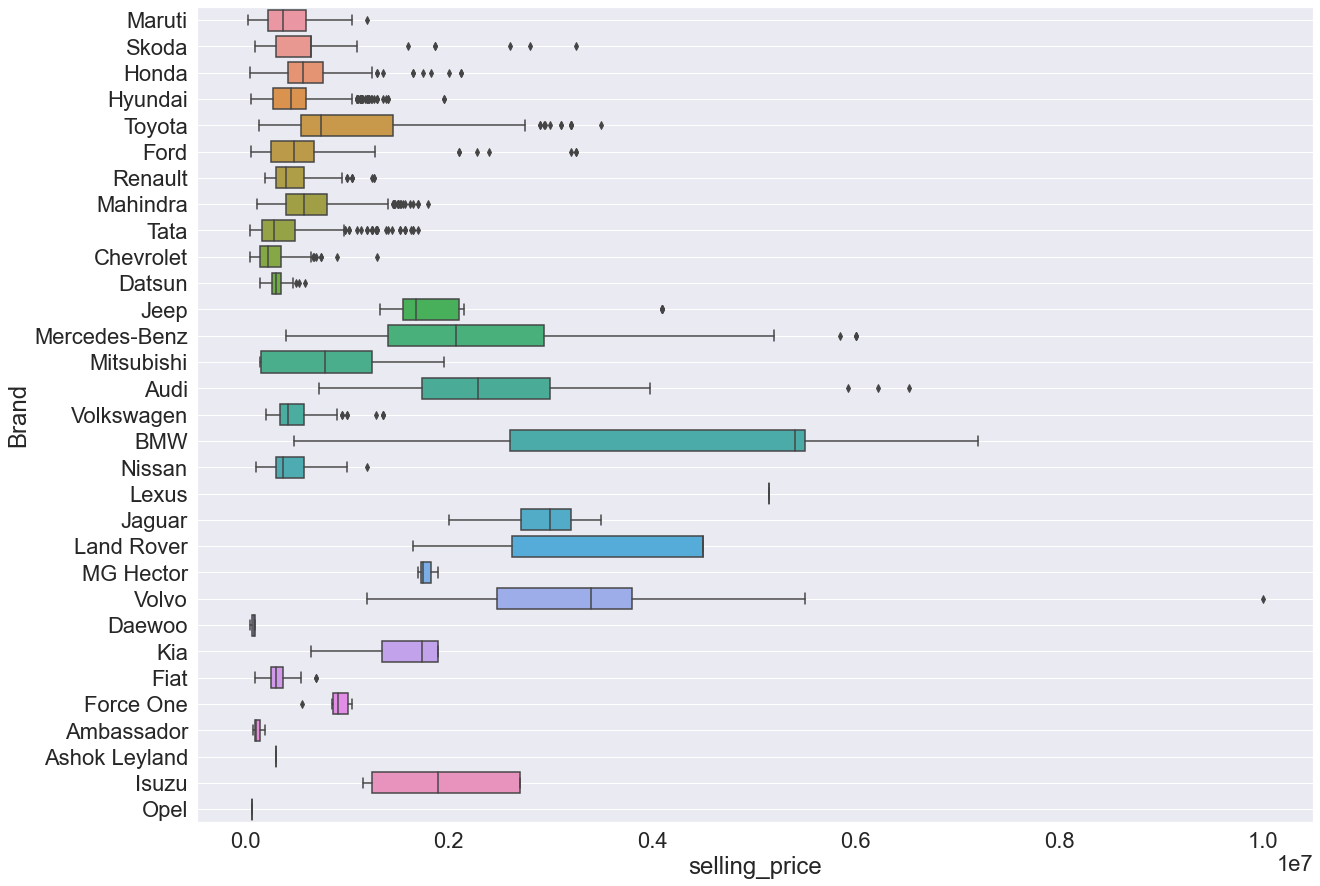

In [69]:
#Price and band 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.boxplot(x='selling_price', y='Brand', data=cars)
plt.grid()

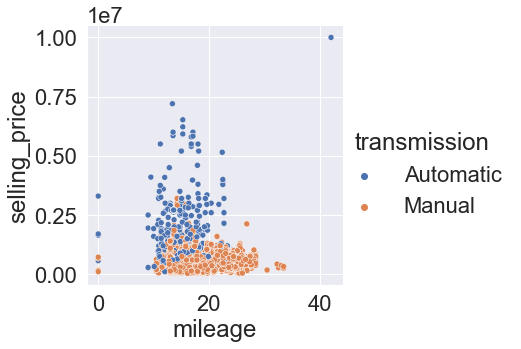

In [70]:
sns.relplot(data=cars, y='selling_price',x='mileage',hue='transmission',aspect=1,height=5)

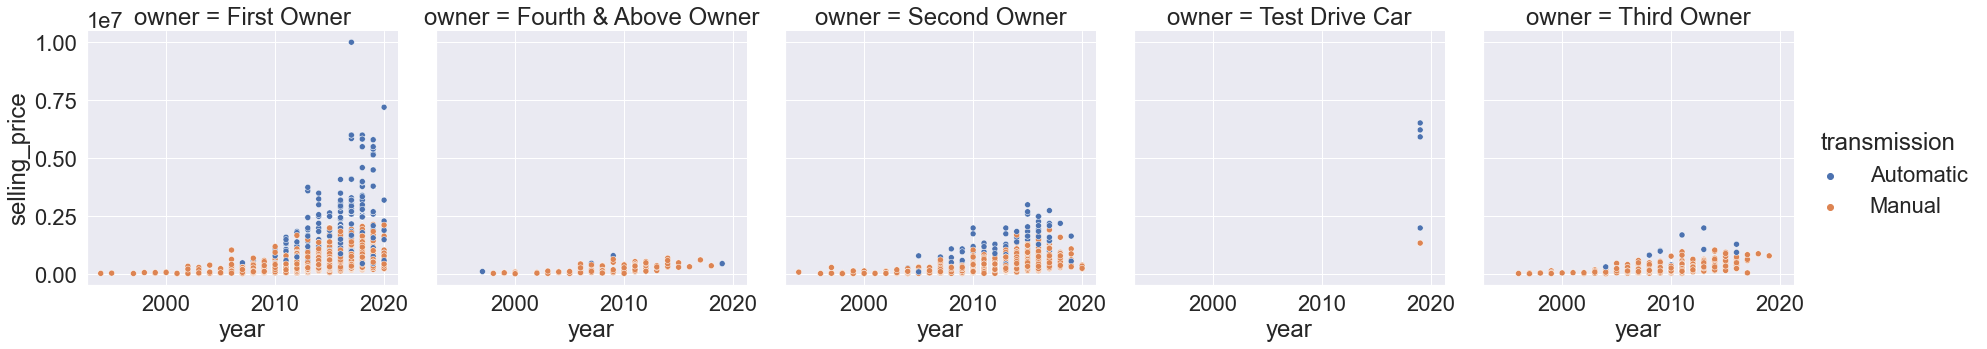

In [73]:
sns.relplot(data=cars, y='selling_price',x='year',col='owner',hue='transmission',aspect=1,height=5)

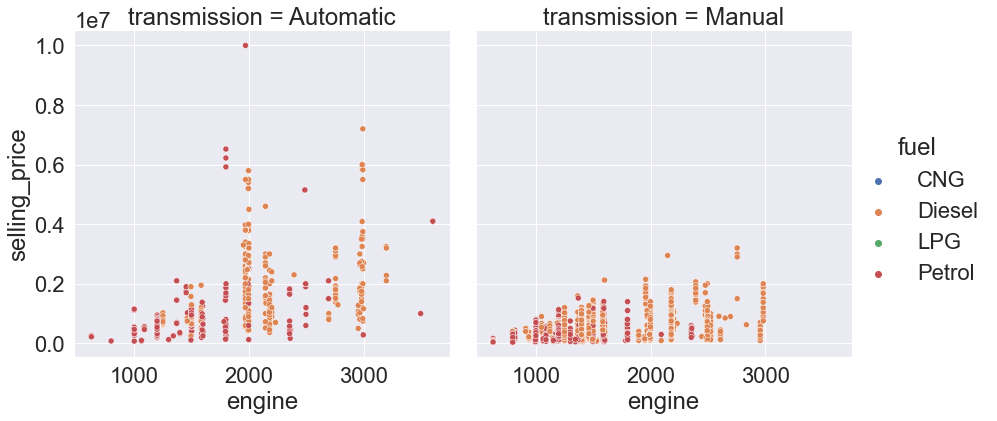

In [72]:
sns.relplot(data=cars, y='selling_price',x='engine',col='transmission',aspect=1,height=6,hue="fuel")

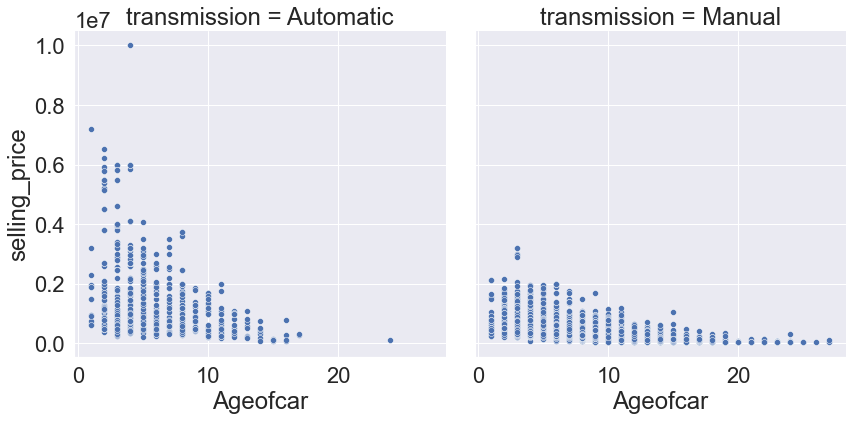

In [74]:
sns.relplot(data=cars, y='selling_price',x='Ageofcar',col='transmission',aspect=1,height=6)

# Insights based on EDA

#### Observations

- Expensive cars like BMW, Land Rover and Volvo are sold in a higher rate.
- 7 Seater cars are more expensive.
- Disel Fuel type cars are more expensive compared to other fuel types.
- As expected, Older model are sold cheaper compared to latest model
- Automatic transmission vehicle have a higher price than manual transmission vehicles.
- Vehicles with more engine capacity have higher prices. 
- Price decreases as number of owner increases.
- Automatic transmission require high engine and power.
- Prices for Cars with fuel type as Disel has increased with recent models 
- Engine,Power,age of the car, Mileage,Fuel type,location,Transmission affect the price.

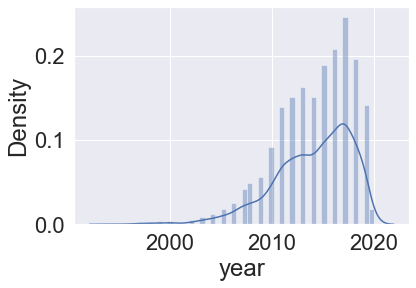

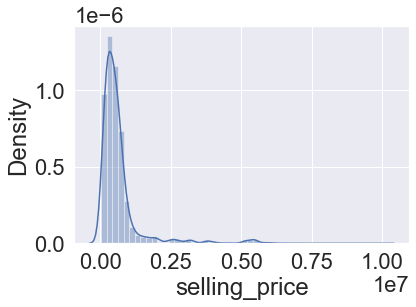

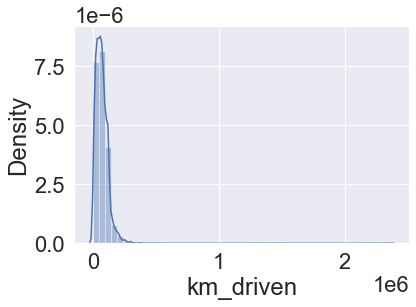

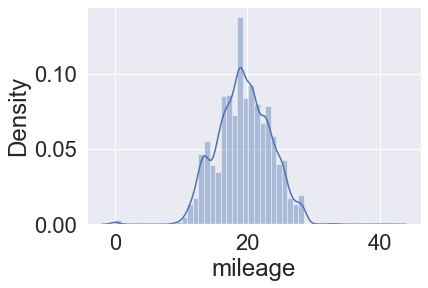

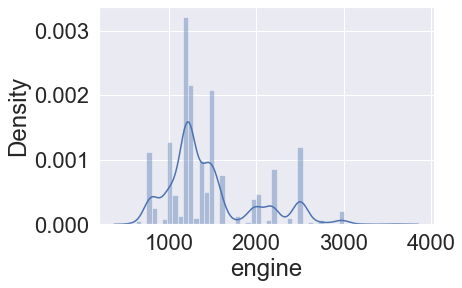

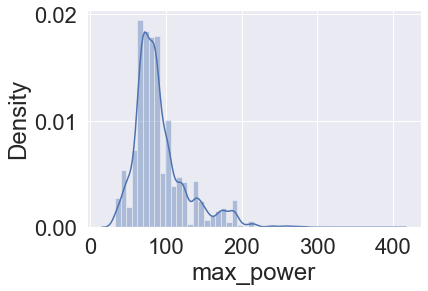

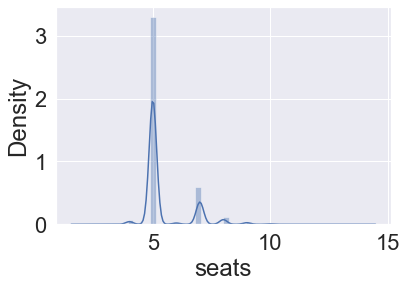

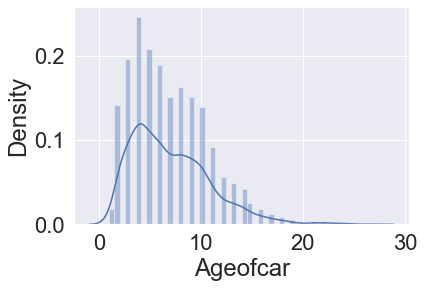

In [75]:
# check distrubution if skewed. If distrubution is skewed , it is advice to use log transform
cols_to_log = cars.select_dtypes(include=np.number).columns.tolist()
for colname in cols_to_log:
    sns.distplot(cars[colname], kde=True)
    plt.show()

Distributions are right skewed, using Log transform can help us in normalization

In [76]:
def Perform_log_transform(df,col_log):
    """#Perform Log Transformation of dataframe , and list of columns """
    for colname in col_log:
        df[colname + '_log'] = np.log(df[colname])
    #df.drop(col_log, axis=1, inplace=True)
    df.info()

In [77]:
#This needs to be done before the data is split
Perform_log_transform(cars,['km_driven','selling_price'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 1 to 8128
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               7906 non-null   object  
 1   year               7906 non-null   int64   
 2   selling_price      7906 non-null   int64   
 3   km_driven          7906 non-null   int64   
 4   Region             7906 non-null   object  
 5   State or Province  7906 non-null   object  
 6   City               7906 non-null   object  
 7   fuel               7906 non-null   category
 8   seller_type        7906 non-null   object  
 9   transmission       7906 non-null   category
 10  owner              7906 non-null   category
 11  mileage            7906 non-null   float64 
 12  engine             7906 non-null   int32   
 13  max_power          7906 non-null   float64 
 14  torque             7906 non-null   object  
 15  seats              7906 non-null   int64   
 16  sold  

In [78]:
cars.drop(['name','Model','year','Brand'],axis=1,inplace=True)

In [79]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 1 to 8128
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   selling_price      7906 non-null   int64   
 1   km_driven          7906 non-null   int64   
 2   Region             7906 non-null   object  
 3   State or Province  7906 non-null   object  
 4   City               7906 non-null   object  
 5   fuel               7906 non-null   category
 6   seller_type        7906 non-null   object  
 7   transmission       7906 non-null   category
 8   owner              7906 non-null   category
 9   mileage            7906 non-null   float64 
 10  engine             7906 non-null   int32   
 11  max_power          7906 non-null   float64 
 12  torque             7906 non-null   object  
 13  seats              7906 non-null   int64   
 14  sold               7906 non-null   object  
 15  Ageofcar           7906 non-null   int64   
 16  Brand_

# Model Building

In [80]:
X = cars.drop(["selling_price", "selling_price_log"], axis=1)
y = cars[["selling_price", "selling_price_log"]]

### Creating dummy variables

In [81]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x

In [82]:
#Dummy variable creation is done before spliting the data , so all the different categories are covered
#create dummy variable
X = encode_cat_vars(X)
X.head()

,km_driven,mileage,engine,max_power,seats,Ageofcar,km_driven_log,Region_East,Region_South,Region_West,...,torque_99.04Nm@ 4500rpm,torque_99.07Nm@ 4500rpm,torque_99.1Nm@ 4500rpm,torque_99.8Nm@ 2700rpm,torque_99Nm@ 4500rpm,sold_Y,Brand_Class_Fiat,Brand_Class_High,Brand_Class_Low,Brand_Class_Mitsubishi
Sales_ID,,,,,,,,,,,,,,,,,,,,,
1,145500,23.40000,1248,74.00000,5,7,11.88793,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,120000,21.14000,1498,103.52000,5,7,11.69525,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,140000,17.70000,1497,78.00000,5,15,11.84940,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,127000,23.00000,1396,90.00000,5,11,11.75194,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,120000,16.10000,1298,88.20000,5,14,11.69525,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.reset_index()
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (5534, 1822)
X_test: (2372, 1822)
y_train: (5534, 2)
y_test: (2372, 2)


In [86]:
# Statsmodel api does not add a constant by default. We need to add it explicitly.
X_train = sm.add_constant(X_train)
# Add constant to test data
X_test = sm.add_constant(X_test)


def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["selling_price_log"], train)
    return olsmodel.fit()

In [87]:
#fit statmodel
olsmodel1 = build_ols_model(X_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:      selling_price_log   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     63.21
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:23:00   Log-Likelihood:                 2515.3
No. Observations:                5534   AIC:                            -1621.
Df Residuals:                    3829   BIC:                             9664.
Df Model:                        1704                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

    
* Both the R-squared (96.6%) and Adjusted R squared (95%) of our model are very high. This is a clear indication that we have been able to create a very good model that is able to explain variance in price of used cars for upto 96% 
    
* The model is not an underfitting or overfitting model.
    
* To be able to make statistical inferences from our model, we will have to test that the linear regression assumptions are followed.
    
* Before we move on to assumption testing, we'll do a quick performance check on the test data.

In [88]:
import math

# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train_pricelog = olsmodel.predict(x_train)
    y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
    y_train_Price = y_train["selling_price"]

    # Prediction on test data
    y_pred_test_pricelog = olsmodel.predict(x_test)
    y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
    y_test_Price = y_test["selling_price"]

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train_Price, y_train_Price),
                    rmse(y_pred_test_Price, y_test_Price),
                ],
                "MAE": [
                    mae(y_pred_train_Price, y_train_Price),
                    mae(y_pred_test_Price, y_test_Price),
                ],
                "MAPE": [
                    mape(y_pred_train_Price, y_train_Price),
                    mape(y_pred_test_Price, y_test_Price),
                ],
            }
        )
    )


# Checking model performance
model_pref(olsmodel1, X_train, X_test)  # High Overfitting.

    Data         RMSE          MAE     MAPE
0  Train 112492.59110  62196.28936 11.43220
1   Test 270492.12637 112052.23910 18.73957


   
* Root Mean Squared Error of train and test data indicates that our model is not overfitting the train data.
    
* Mean Absolute Error indicates that our current model is able to predict used cars prices within mean error on test data.
    
* The units of both RMSE and MAE are same - Lakhs in this case. But RMSE is greater than MAE because it penalises the outliers more.
    
* Mean Absolute Percentage Error is 11% - 18 % on the test data. 

### Observations from the model


    
 **It is important to note here that the predicted values are log(price) and therefore coefficients have to be converted accordingly to understand their influence in price.**

1. With our linear regression model we have been able to capture ~96 variation in our data.
    
2. The model indicates that the most significant predictors of price of used cars are - 
    - Age of the car
    - Number of seats in the car
    - Power of the engine
    - Mileage
    - Kilometers Driven
    - Location
    - Fuel_Type
    - OwnerType
    - Transmission - Automatic/Manual
        
3. Newer cars sell for higher prices. 1 unit increase in age of the car leads to [ exp(0.1123) = 1.12 Lakh ] decrease in the price of the vehicle, when everything else is constant.

4. As the number of seats increases, the price of the car increases - exp(0.05) = 1.05 Lakhs
    
5. Mileage is inversely correlated with Price. Generally, high mileage cars are the lower budget cars.
    
6. Kilometers Driven have a negative relationship with the price which is intuitive. A car that has been driven more will have more wear and tear; hence be sold at a lower price, when everything else being 0.
    
7. The categorical variables are a little hard to interpret. But it can be seen that all the car_category variables in the dataset have a negative relationship with the Price and the magnitude of this negative relationship decrease as the brand category moves to lower brands.

### Recommendations



- Our final Linear Regression model has a MAPE of 18% on the test data, which means that we are able to predict within 18% of the price value. This is a very good model but can be further improved
    
- Some southern Region tend to have higher prices. It might be a good strategy to plan growth in southern cities using this information.
   
- Based on Analysis,  we can to divide our cars into 3 segment Low, Medium and High budget.
    
- Brands like Maruti, Hyundai ,Honda are low budget and very popular brands in used cars market.
    
- Brands like BMW, Bentley, Jaguar, Land Rover, Mercedes Benz, MG Hector are high budget cars and are mostly bought by car enthusiast who are ready to buy a  two user owned cars at higher price as well. 
    
- Brands like Toyota,Volvo can be Medium budget cars.
    
- Mumbai and Hyderbad seems to be more popular in Used car market, need to verify this with more data from other demographic regions. The next step post that would be to cluster different sets of data and see if we should make multiple models for different locations/car types. 
    
- Need to acquire more Automatic cars to earn more profits, as this cars are sold at higher prices.
    
- With Increasing petrol rates diesel cars are in more demand in recent years, acquiring and selling them can be of high profits.
    
- Along with this we can include scheme like take a test drive for half day to pursue customer to buy.
    
- We can provide Car maintenance packages where customers pays a small upfront fees and can bring the car for servicing anytime in a year to attract more customers.
    
  
<b>Important points</b>
- There are more soft parameters which also should be considered when buying a car, the wear and tear of the car has to be thorough and how much the company will have to work on car to make it ready for sale.
    
- If the car as already been in some kind of accident that would also effect the price.
    
- Other good to have feature like AC, Moon roof, Airbags can also have impact on the price.
    
- Car model that are too old will depreciate a lot  can impact the demand .